<a href="https://colab.research.google.com/github/Ryuk1302/Deep-learning-Activity/blob/main/DL_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
import pathlib


from PIL import Image
from pathlib import Path
from tensorflow.keras import layers,models

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Update the path to the "deep learning" folder in your Google Drive
loaded_data = Path("/content/drive/My Drive/DL")


# Initialize a counter to keep track of the total number of images
total_image_count = 0

# Check if there are any subfolders (dress categories)
dress_categories = list(loaded_data.glob('*'))
if len(dress_categories) > 0:
    for dress_category in dress_categories:
        dress_images = list(dress_category.glob('*.jpg')) + list(dress_category.glob('*.png'))
        if len(dress_images) > 0:
            total_image_count += len(dress_images)
    print("Total number of dress images found:",total_image_count)
else:
    print("No dress categories (subfolders) found in the directory.")

set_height, set_width = 180, 180
batch_size = 32

Total number of dress images found: 2345


In [8]:
loaded_data

PosixPath('/content/drive/My Drive/DL')

In [9]:
# Hyperparameter tuning setup
dropout_rates = [0.0, 0.2, 0.4, 0.6]  # Define a list of dropout rates to try
best_model = None
best_accuracy = 0.6
dropout_rate = [0.4]

In [10]:
training_images = tf.keras.preprocessing.image_dataset_from_directory(
    loaded_data,
    subset="training",
    validation_split = 0.25,
    seed=18,
    image_size=(set_height, set_width),
    batch_size=batch_size
)
validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    loaded_data,
    subset="validation",  # Use "validation" for the validation subset
    validation_split=0.25,  # Adjust this value as needed
    seed=18,
    image_size=(set_height, set_width),
    batch_size=batch_size
)
food_classes = training_images.class_names
print(food_classes)
dataset_classes = 2
from tensorflow.keras.models import Sequential
model=Sequential([])

Found 2398 files belonging to 2 classes.
Using 1799 files for training.
Found 2398 files belonging to 2 classes.
Using 599 files for validation.
['Fruits', 'vegetables']


In [11]:
def preprocess(img, label):
    return tf.image.resize(img, [img_height, img_width]) / 255, label

In [12]:
import matplotlib.pyplot as plt

def create_cnn_model(dropout_rate):
    model = Sequential([
        layers.experimental.preprocessing.Rescaling(1./255, input_shape=(set_height, set_width, 3)),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),  # Add dropout layer with the specified rate
        layers.Dense(dataset_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model


In [13]:
#Define a list of dropout rates to try
dropout_rates = [0.0, 0.2, 0.4]
epochs=10
# Store training history for each model
training_histories = []

# Train models with different dropout rates
for dropout_rate in dropout_rates:
    print(f"Training model with dropout rate: {dropout_rate}")
    model = create_cnn_model(dropout_rate)
    history = model.fit(
        training_images,
        validation_data=validation_images,
        epochs=epochs
    )
    training_histories.append((dropout_rate,history))

Training model with dropout rate: 0.0
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


57/57 [==============================] - 492s 7s/step - loss: 0.6212 - accuracy: 0.6676 - val_loss: 0.4098 - val_accuracy: 0.8347
Epoch 2/10
57/57 [==============================] - 105s 2s/step - loss: 0.3252 - accuracy: 0.8638 - val_loss: 0.3838 - val_accuracy: 0.8314
Epoch 3/10
57/57 [==============================] - 103s 2s/step - loss: 0.2365 - accuracy: 0.9072 - val_loss: 0.2324 - val_accuracy: 0.8948
Epoch 4/10
57/57 [==============================] - 103s 2s/step - loss: 0.1508 - accuracy: 0.9439 - val_loss: 0.3633 - val_accuracy: 0.8698
Epoch 5/10
57/57 [==============================] - 112s 2s/step - loss: 0.1170 - accuracy: 0.9550 - val_loss: 0.3872 - val_accuracy: 0.8698
Epoch 6/10
57/57 [==============================] - 97s 2s/step - loss: 0.0992 - accuracy: 0.9655 - val_loss: 0.2204 - val_accuracy: 0.9332
Epoch 7/10
57/57 [==============================] - 104s 2s/step - loss: 0.0553 - accuracy: 0.9805 - val_loss: 0.2218 - val_accuracy: 0.9349
Epoch 8/10
57/57 [=======

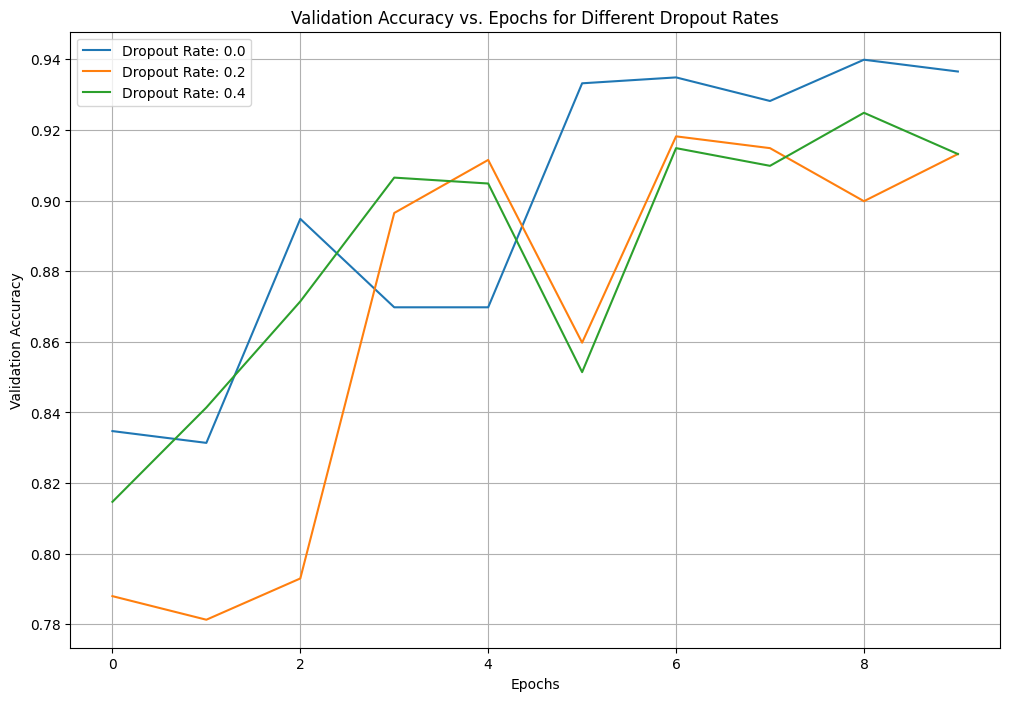

In [14]:
# Visualize the training history for different dropout rates
plt.figure(figsize=(12, 8))
for dropout_rate, history in training_histories:
    plt.plot(history.history['val_accuracy'], label=f'Dropout Rate: {dropout_rate}')
plt.title('Validation Accuracy vs. Epochs for Different Dropout Rates')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
op_model = create_cnn_model(0.0)
epochs=10

CNN_model2 = op_model.fit(
  training_images,
  validation_data=validation_images,
  epochs=epochs
)

Epoch 1/10
57/57 [==============================] - 95s 2s/step - loss: 0.5413 - accuracy: 0.7137 - val_loss: 0.3467 - val_accuracy: 0.8598
Epoch 2/10
57/57 [==============================] - 102s 2s/step - loss: 0.2817 - accuracy: 0.8844 - val_loss: 0.2813 - val_accuracy: 0.8915
Epoch 3/10
57/57 [==============================] - 101s 2s/step - loss: 0.2034 - accuracy: 0.9288 - val_loss: 0.2330 - val_accuracy: 0.9215
Epoch 4/10
57/57 [==============================] - 101s 2s/step - loss: 0.1247 - accuracy: 0.9600 - val_loss: 0.2034 - val_accuracy: 0.9366
Epoch 5/10
57/57 [==============================] - 101s 2s/step - loss: 0.1048 - accuracy: 0.9622 - val_loss: 0.2534 - val_accuracy: 0.9199
Epoch 6/10
57/57 [==============================] - 97s 2s/step - loss: 0.0683 - accuracy: 0.9800 - val_loss: 0.2448 - val_accuracy: 0.9316
Epoch 7/10
57/57 [==============================] - 95s 2s/step - loss: 0.0517 - accuracy: 0.9822 - val_loss: 0.2732 - val_accuracy: 0.9399
Epoch 8/10
57/57

In [16]:
def predict_input_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  print(model.predict(img_4d)[0])
  return {food_classes[i]: float(prediction[i]) for i in range(2)}

In [17]:
# Evaluate the model on validation data
val_accuracy=CNN_model2.history['val_accuracy'][-1]
print(f"Validation accuracy with dropout rate {dropout_rate}: {val_accuracy}")

# Check if this model is the best so far
if val_accuracy > best_accuracy:
   best_accuracy = val_accuracy
   best_model = model

Validation accuracy with dropout rate 0.4: 0.9298831224441528


In [18]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 6.8 MB/s eta 0:

In [ ]:
# Save the best model to a file
model.save('/content/drive/My Drive/DL/best_model.h5')

In [ ]:
import gradio as gr

In [ ]:
image = gr.inputs.Image(shape=(180,180))

label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_input_image, inputs=image, outputs=label,interpretation='default').launch(debug='True',share=True)

<ipython-input-21-70d8e7926d97>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(180,180))
<ipython-input-21-70d8e7926d97>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(180,180))
<ipython-input-21-70d8e7926d97>:3: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=5)
<ipython-input-21-70d8e7926d97>:3: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=5)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://dfbe6757bb127d39f3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 55ms/step
[4.5945468e-05 9.9995410e-01]
1/1 [==============================] - 0s 32ms/step
[1.1393405e-04 9.9988604e-01]
1/1 [==============================] - 0s 33ms/step
[0.7497571  0.25024292]
1/1 [==============================] - 0s 87ms/step
[1.7540857e-04 9.9982458e-01]
1/1 [==============================] - 0s 31ms/step
[5.4652337e-04 9.9945349e-01]
1/1 [==============================] - 0s 34ms/step
[9.6932804e-04 9.9903071e-01]
1/1 [==============================] - 0s 36ms/step
[0.02856693 0.97143304]
1/1 [==============================] - 0s 54ms/step
[6.634568e-05 9.999336e-01]
